In [55]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold




#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix



#Miscellaneous Utilitiy Libraries--------------------------------------

In [56]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [58]:
# See numeric values

df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [59]:
# Check unique Values

unique = df.columns.to_list()

for i in unique:
    print (f'there is columns {i}, and these the unique values :')
    print(df[i].unique())

there is columns Gender, and these the unique values :
['Female' 'Male']
there is columns Age, and these the unique values :
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
there is columns Height, and these the unique values :
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
there is columns Weight, and these the unique values :
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
there is columns family_history_with_overweight, and these the unique values :
['yes' 'no']
there is columns FAVC, and these the unique values :
['no' 'yes']
there is columns FCVC, and these the unique values :
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.

In [60]:
# Check Count Categorical Unique Values

unique_categrical = df.select_dtypes(include=['object'])

for i in unique:
    print(df[i].value_counts(),end ='\n')

Gender
Male      1068
Female    1043
Name: count, dtype: int64
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
21.568951      1
23.647935      1
24.196367      1
24.284833      1
23.761970      1
Name: count, Length: 1402, dtype: int64
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.715820     1
1.747987     1
1.817917     1
1.808350     1
1.631547     1
Name: count, Length: 1574, dtype: int64
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
129.466541     1
147.296186     1
142.559161     1
150.516480     1
102.174953     1
Name: count, Length: 1525, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
FCVC
3.000000    652
2.000000    600
1.000000     33
2.938031      2
2.442536      2
           ... 
2.919526      1
2.72412

In [61]:
unique_categrical = unique_categrical.drop(columns='NObeyesdad')

<function matplotlib.pyplot.show(close=None, block=None)>

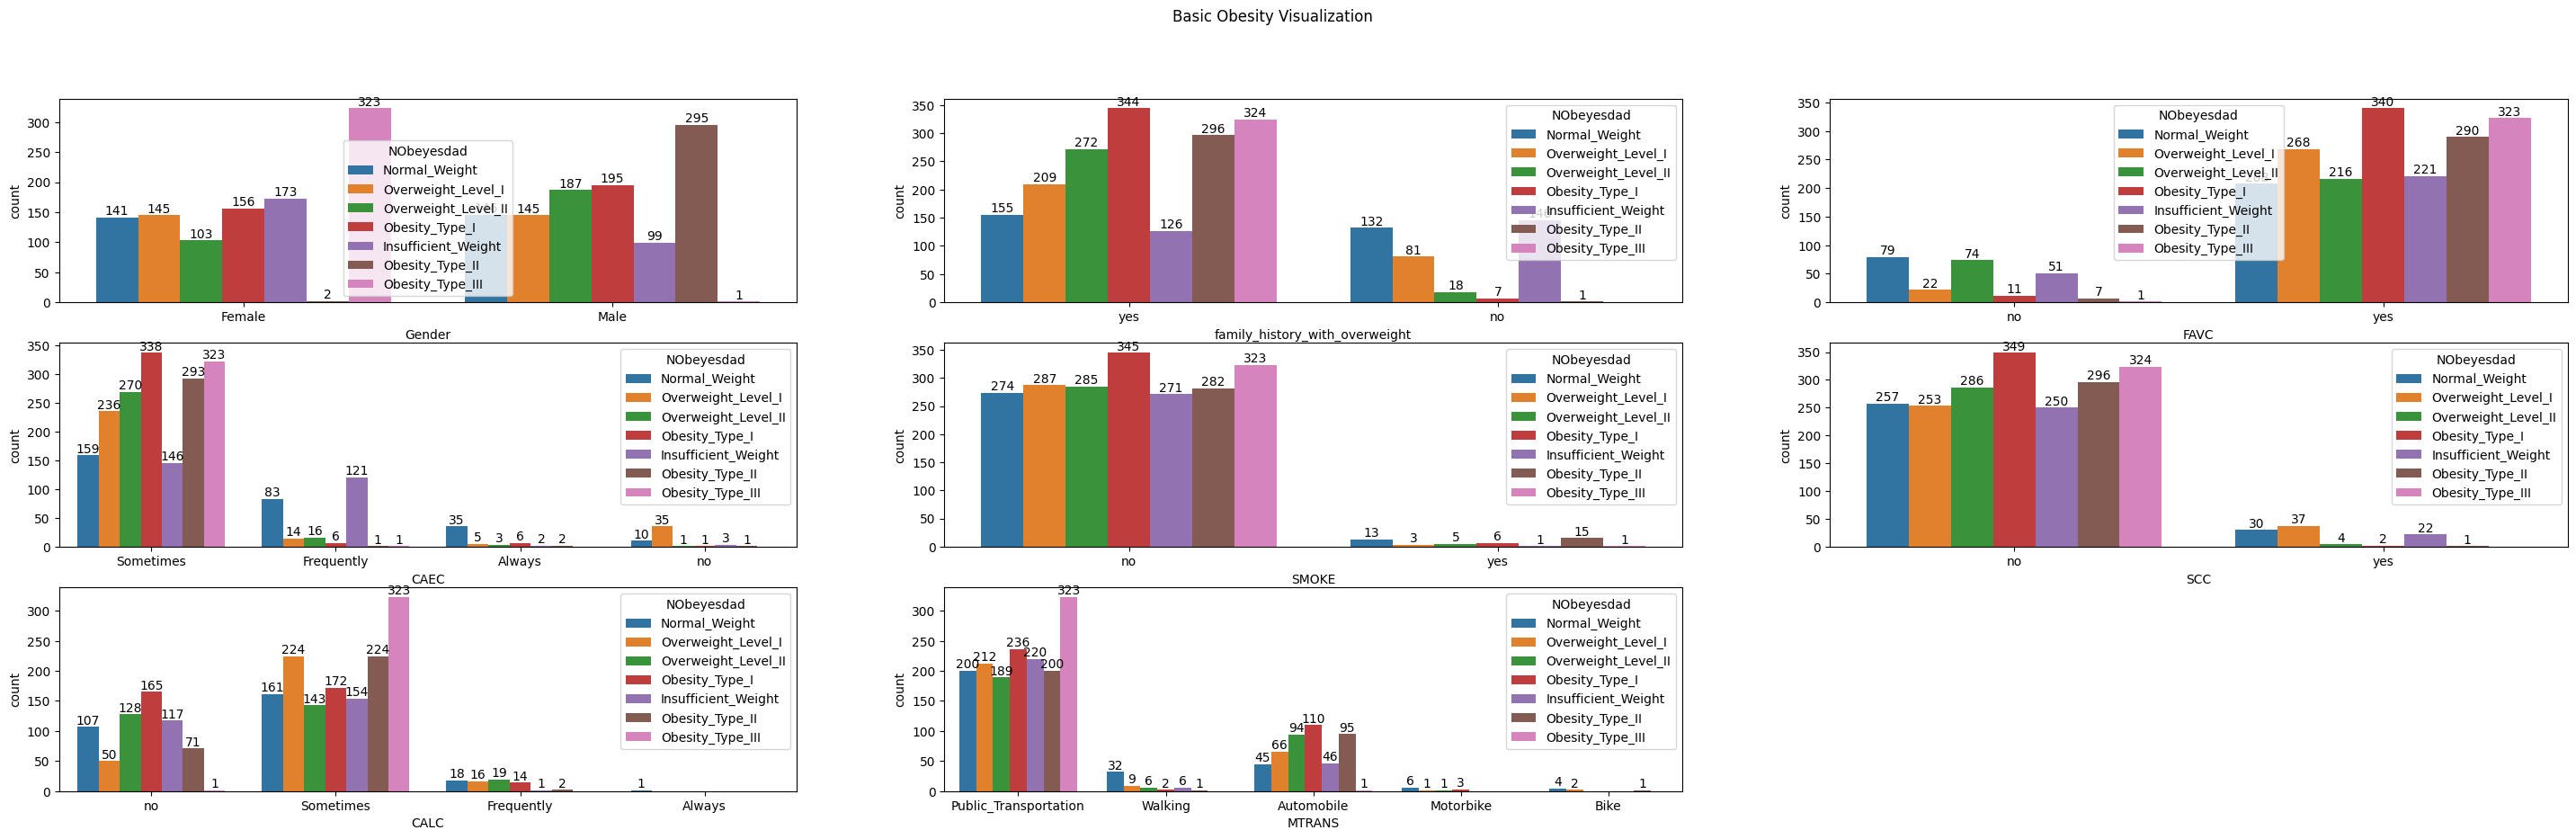

In [62]:
# Create Visualization

# create figure
plt.figure(figsize=(36,10))

# create title
plt.suptitle('Basic Obesity Visualization')

# create plot
for i in range (unique_categrical.shape[1]):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(
        data = df,
        x = unique_categrical.columns[i],
        hue = df['NObeyesdad']
    )
    for x in ax.containers:
        ax.bar_label(x,label_type='edge')

plt.tight_layout
plt.show

Insight : 
* Gender : Pada kelompok pria cenderung berada pada kondisi Obesity type II sedangkan pada wanita berada pada kondisi Obesity type III
* FamHis : Sebanyak 74.6% individu dengan riwayat keluarga overweight, berada dalam ketagori overweight dan obesitas
* Makanan Tinggi Kalori (FAVC) : individu dengan riwayat konsumsi makan makanan tinggi kalori 76.4% berada pada kategori overweight dan obesitas
* Makan Snack sehabis makan (CAEC) : Individu dengan riwayat terkadang makan snack diantara makan besar cenderung memiliki kondisi obesitas dan overweight
* SMOKE : Individu dengan riwayat tidak merokok cenderung memiliki kondisi obesitas dan overweight
* SCC (Monitoring Kalori) : Individu yang tidak melakukan monitoring kalori pada makanannya cenderung memiliki kondisi obesitas dan overweight
* CALC (Alkohol) : Individu dengan kebiasaan terkadang minum alkohol cenderung memiliki kondisi obesitas dan overweight
* MTRANS (PubTrans) : Individu pengguna transportasi umum cenderung memiliki kondisi obesitas dan overweight

In [63]:
# Check null values

df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Data Preprocessing

In [64]:
df.shape

(2111, 17)

In [65]:
# Check duplicate values

df.duplicated().sum()

np.int64(24)

In [66]:
# Remove duplicate values

df.drop_duplicates(inplace=True)

In [67]:
# Check duplicate values II

df.duplicated().sum()   

np.int64(0)

In [68]:
# Makes columns name to lower case

for x in df.columns:
    df.rename(columns={x:x.lower()},inplace=True)

In [69]:
# Check columns name

df.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'calc', 'mtrans', 'nobeyesdad'],
      dtype='object')

In [70]:
# Check outliers

outliers = df.select_dtypes(include=['float64','int64'])
outliers.head()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


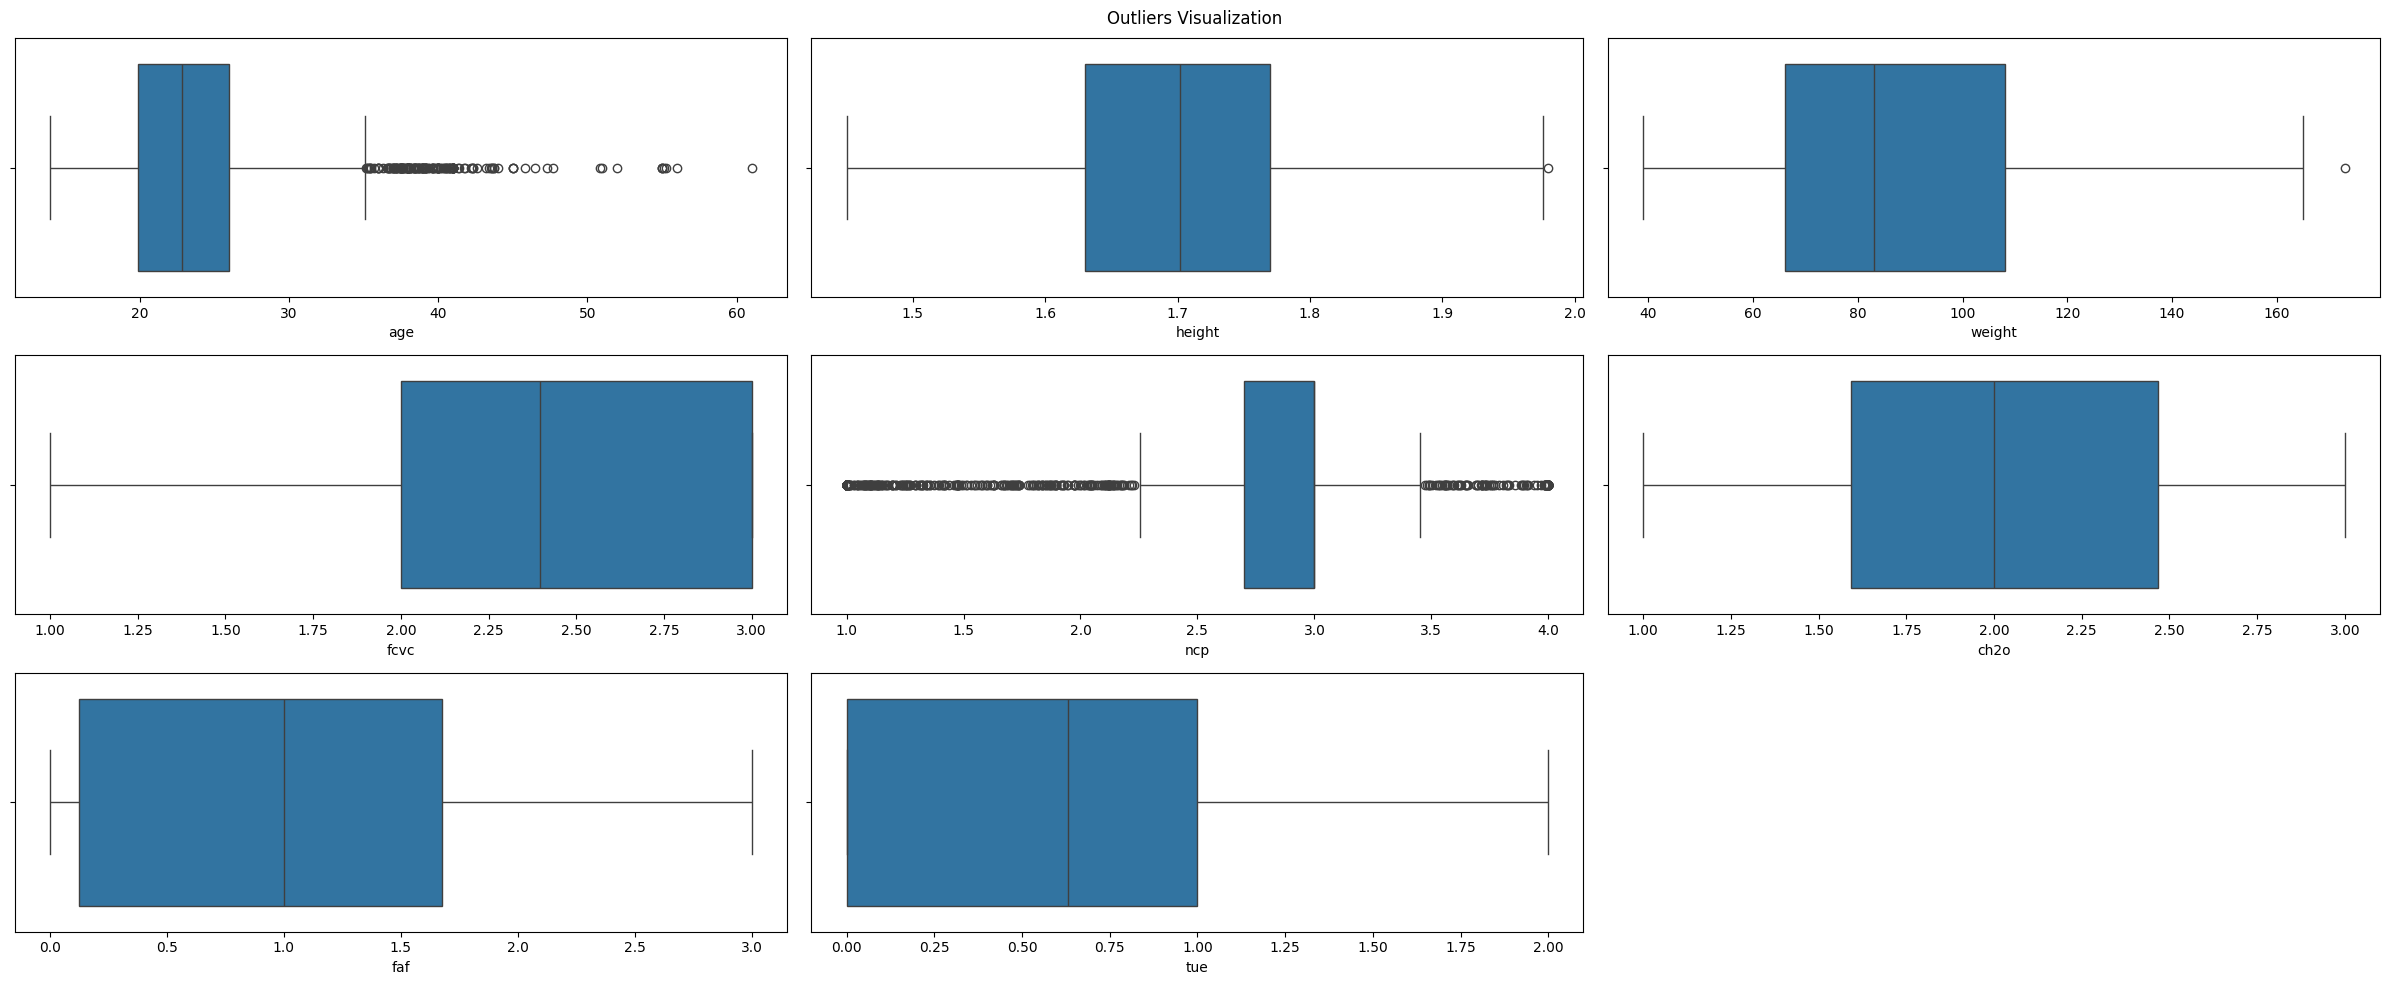

In [71]:
# Create Outliers Visualization

# Create figure
plt.figure(figsize=(24,10))

# Create title
plt.suptitle('Outliers Visualization')

# Create plot
for i in range(outliers.shape[1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,
                x=outliers.columns[i])
plt.tight_layout()
plt.show()

In [72]:
def remove_outliers (df):
    df_cleaned = df.copy()
    for x in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3-Q1

        # Define Bounds
        lower_bounds = Q1 - 1.5*IQR
        upper_bounds = Q3 + 1.5*IQR

        # Filter only cleaned data

        df_cleaned = df_cleaned[(df_cleaned[x] >= lower_bounds) & (df_cleaned[x] <= upper_bounds)]
    
    return df_cleaned

In [73]:
df_used = remove_outliers(df)

In [74]:
print("Original DataFrame:")
print(df.shape)

print("\nCleaned DataFrame (df_used):")
print(df_used.shape)

Original DataFrame:
(2087, 17)

Cleaned DataFrame (df_used):
(1388, 17)


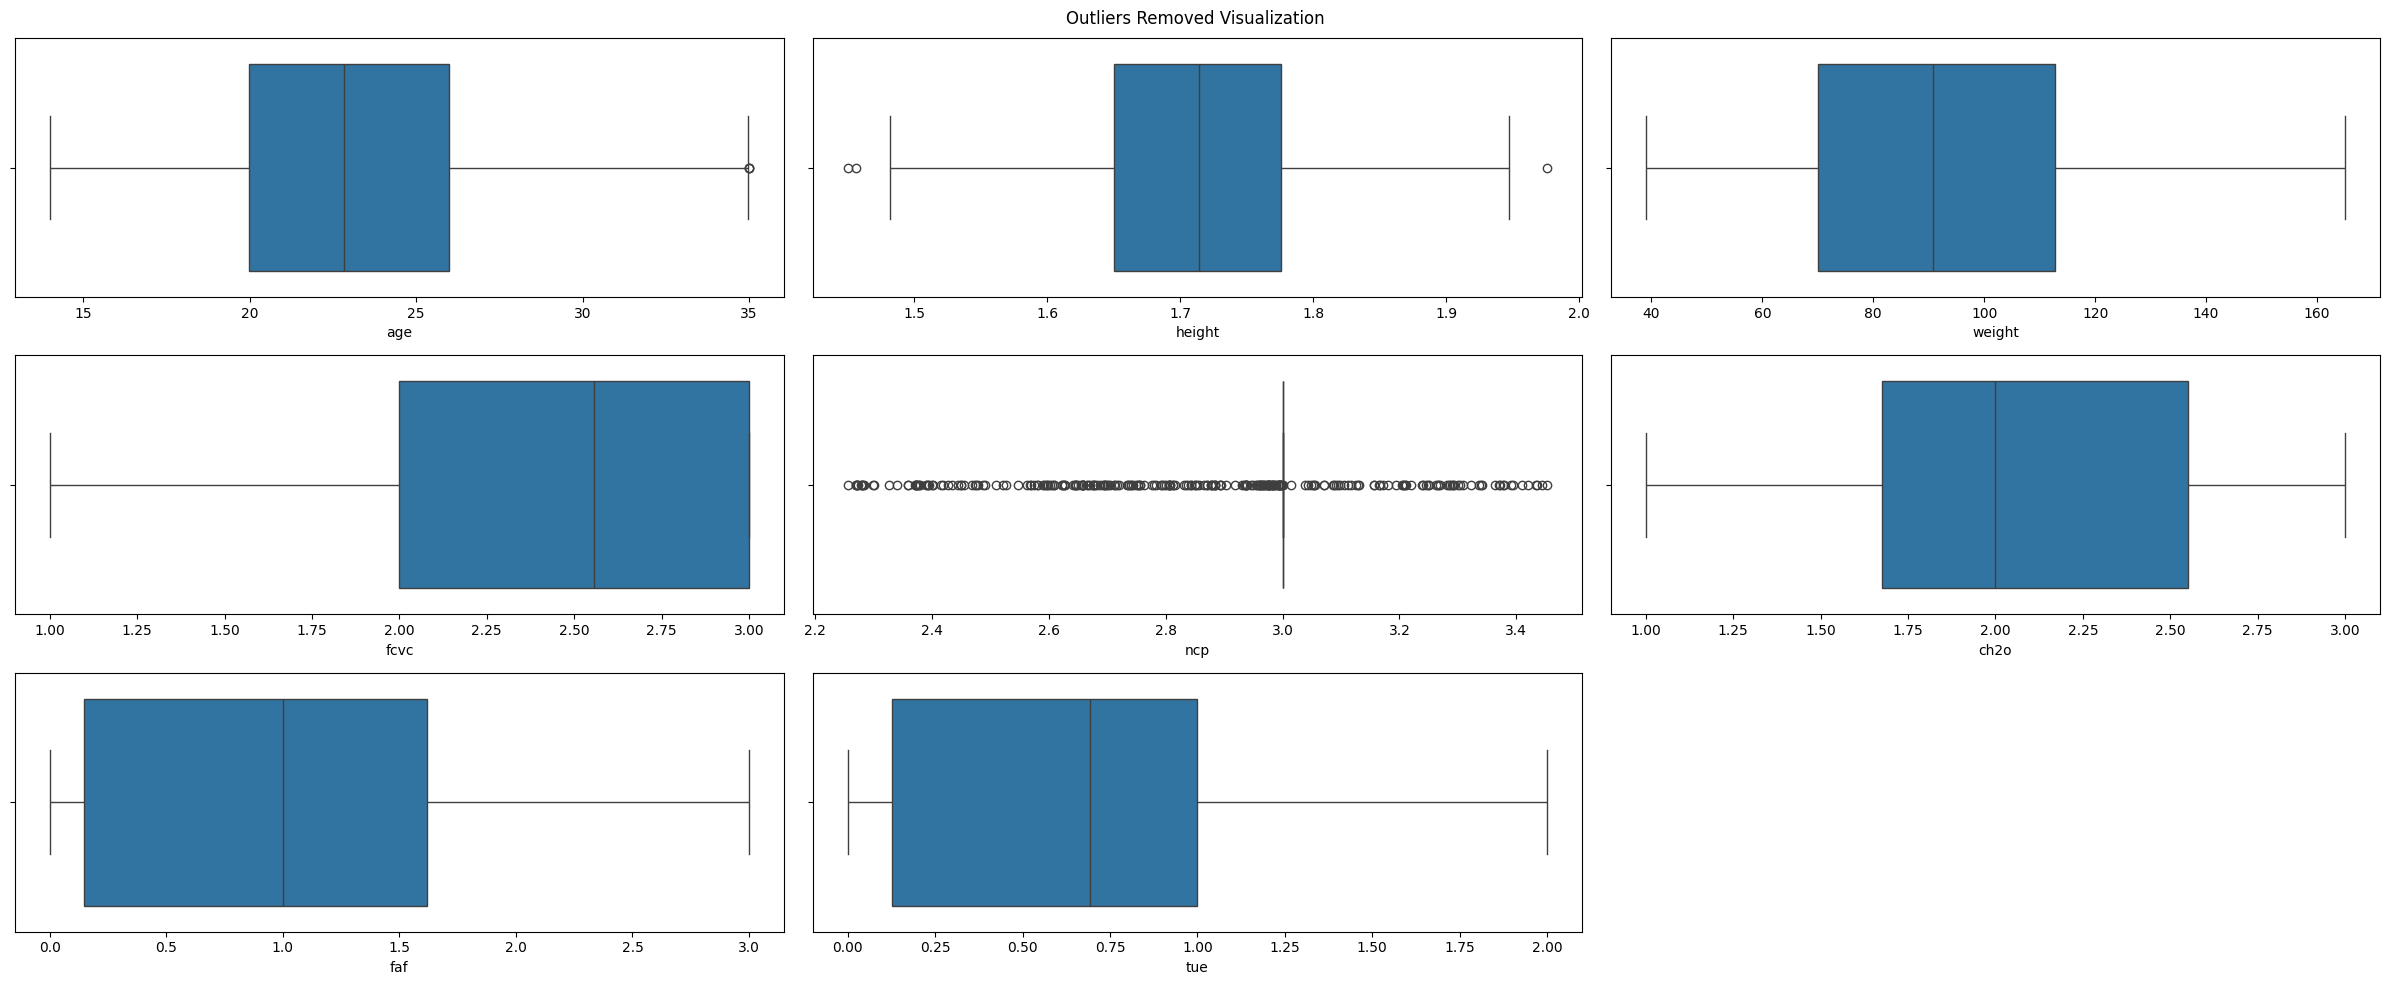

In [75]:
# Check Outliers II

# Create figure
plt.figure(figsize=(24,10))

# Create title
plt.suptitle('Outliers Removed Visualization')

# Create plot
for i in range(outliers.shape[1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df_used,
                x=outliers.columns[i])
plt.tight_layout()
plt.show()

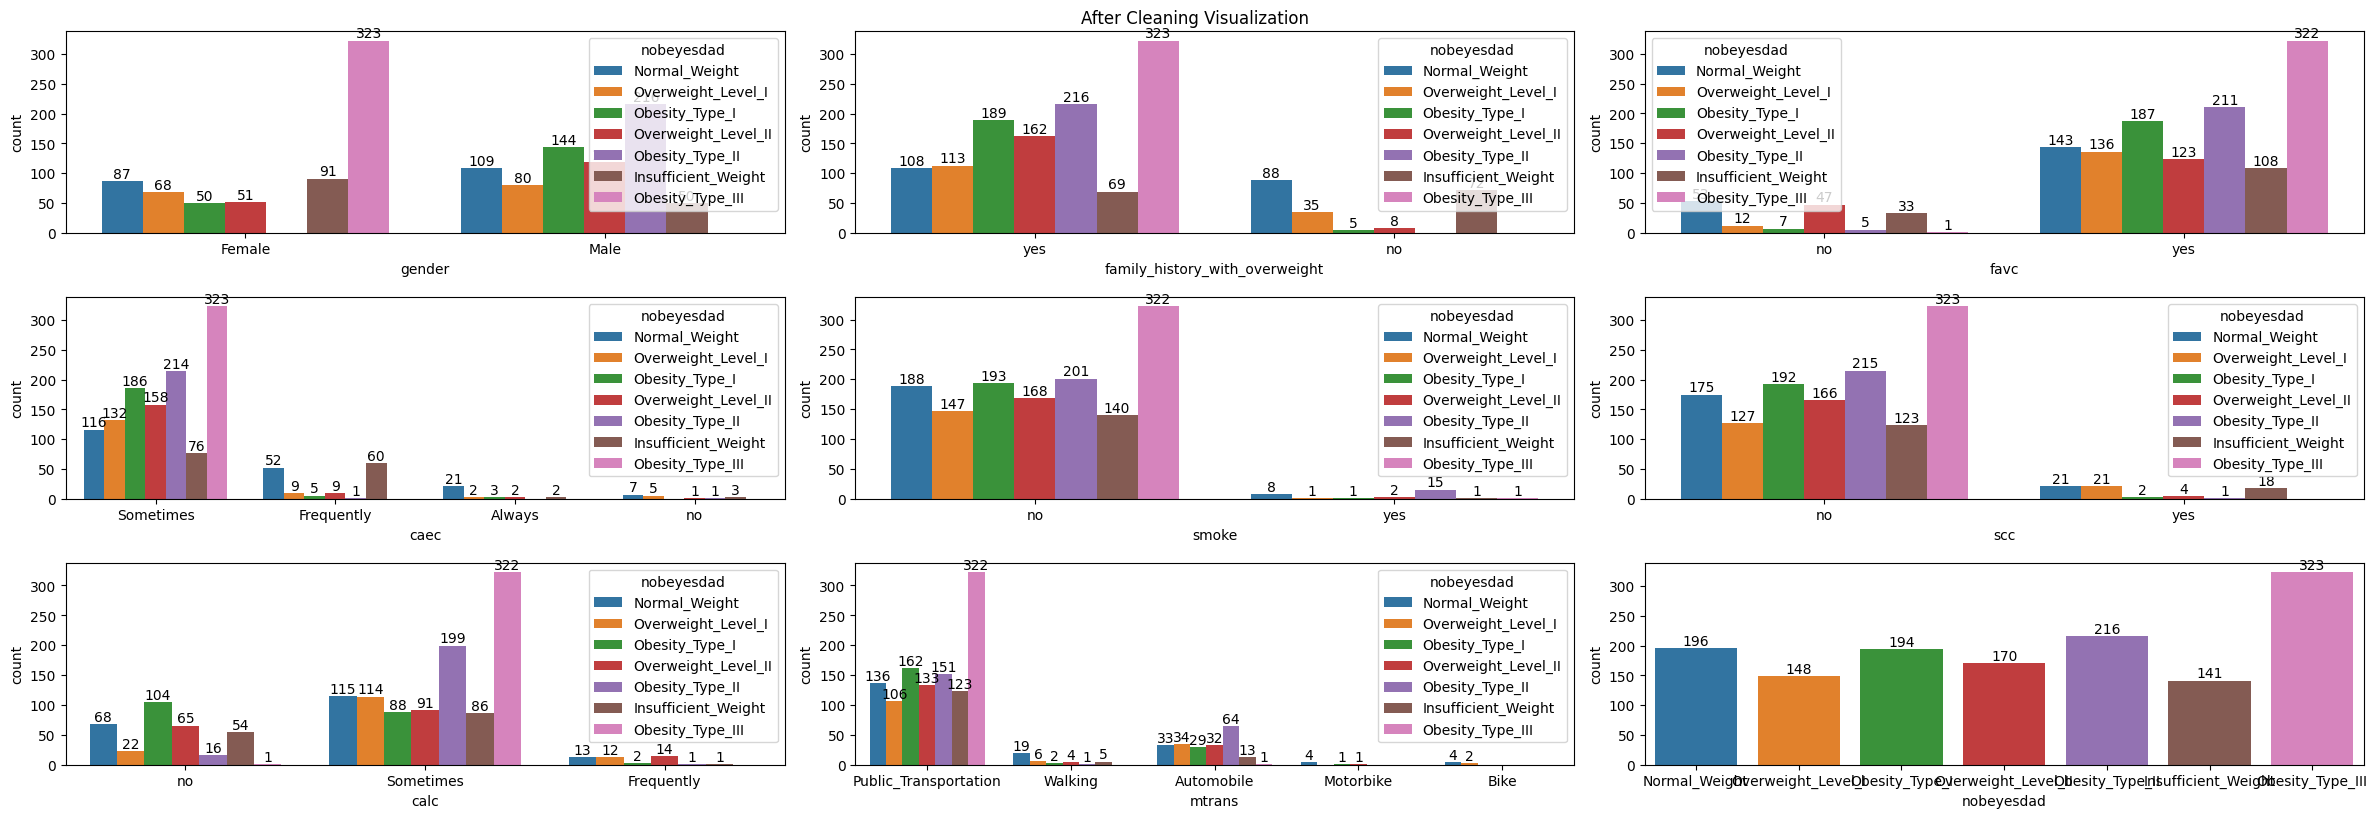

In [76]:
# Plot After Cleaning
cat_used = df_used.select_dtypes(include=['object'])

# Create Figure
plt.figure(figsize=(24,16))

# Create Title
plt.suptitle('After Cleaning Visualization')

# Create Plot
for j in range(cat_used.shape[1]):
    plt.subplot(6,3,j+1)
    ax = sns.countplot(
        data=df_used,
        hue='nobeyesdad',
        x=cat_used.columns[j]
    )
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()


In [77]:
# Export for Data visualization
df_used.to_csv('Porto_Obesity.csv', index=False)

In [78]:
# Check number of unique each column
for i in (df_used.columns):
    print('There are number of unique from column',i,)
    print('The data type is', df_used[i].dtypes)
    print(df_used[i].nunique())


There are number of unique from column gender
The data type is object
2
There are number of unique from column age
The data type is float64
916
There are number of unique from column height
The data type is float64
1073
There are number of unique from column weight
The data type is float64
1067
There are number of unique from column family_history_with_overweight
The data type is object
2
There are number of unique from column favc
The data type is object
2
There are number of unique from column fcvc
The data type is float64
491
There are number of unique from column ncp
The data type is float64
268
There are number of unique from column caec
The data type is object
4
There are number of unique from column smoke
The data type is object
2
There are number of unique from column ch2o
The data type is float64
906
There are number of unique from column scc
The data type is object
2
There are number of unique from column faf
The data type is float64
844
There are number of unique from column

In [79]:
df_used.shape

(1388, 17)

# Label Encoding

In [80]:
df_encode = df_used.copy()

In [81]:
# Encode family_history_with_overweight :
df_encode['family_history_with_overweight'] = df_encode['family_history_with_overweight'].map({
    'yes' : 1,
    'no' : 0
})

# Encode favc :
df_encode['favc'] = df_encode['favc'].map({
    'yes' : 1,
    'no' : 0
})

# Encode gender :
df_encode['gender'] = df_encode['gender'].map({
    'Female' : 0,
    'Male' : 1
})

# Encode smoke :
df_encode['smoke'] = df_encode['smoke'].map({
    'yes' : 1,
    'no' : 0
})

# Encode caec :
df_encode['caec'] = df_encode['caec'].map({
    'Always' : 1,
    'Frequently' : 1,
    'Sometimes' : 0,
    'no' :0
})

# Encode sec :
df_encode['scc'] = df_encode['scc'].map({
    'yes' : 1,
    'no' :0
})

# Enocde calc :
df_encode['calc'] = df_encode['calc'].map({
    'no' : 0,
    'Sometimes' : 1,
    'Frequently' : 1

})

# Encode Mtrans :
df_encode['mtrans'] = df_encode['mtrans'].map({
    'Public_Transportation' : 0,
    'Walking' : 1,
    'Automobile' : 1,
    'Motorbike' : 1,
    'Bike' :1
})

# Encode Obesity :
df_encode['nobeyesdad'] = df_encode['nobeyesdad'].map({
    'Obesity_Type_I' : 2,
    'Obesity_Type_III' : 2,
    'Obesity_Type_II' :2,
    'Overweight_Level_I' : 1,
    'Overweight_Level_II' :1,
    'Insufficient_Weight' : 0,
    'Normal_Weight' : 0

})


In [82]:
df_encode.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1,1
5,1,29.0,1.62,53.0,0,1,2.0,3.0,0,0,2.0,0,0.0,0.0,1,1,0


In [83]:
unique_encode = df_encode.columns.to_list()

for x in (unique_encode):
    print('There are unique values of column',x)
    print(df_encode[x].dtypes)
    print(df_encode[x].nunique())

There are unique values of column gender
int64
2
There are unique values of column age
float64
916
There are unique values of column height
float64
1073
There are unique values of column weight
float64
1067
There are unique values of column family_history_with_overweight
int64
2
There are unique values of column favc
int64
2
There are unique values of column fcvc
float64
491
There are unique values of column ncp
float64
268
There are unique values of column caec
int64
2
There are unique values of column smoke
int64
2
There are unique values of column ch2o
float64
906
There are unique values of column scc
int64
2
There are unique values of column faf
float64
844
There are unique values of column tue
float64
832
There are unique values of column calc
int64
2
There are unique values of column mtrans
int64
2
There are unique values of column nobeyesdad
int64
3


# Check Correlation

In [84]:
corr_matrix = df_encode.corr()
corr_matrix

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
gender,1.000000,0.171235,0.608142,0.033004,0.075119,0.030560,-0.396606,-0.131306,-0.079402,0.070549,0.074053,-0.118783,0.162438,0.020361,-0.061958,0.223724,-0.006680
age,0.171235,1.000000,0.136305,0.305750,0.236978,0.114808,0.057494,-0.089747,-0.151296,0.128557,0.038517,-0.120947,-0.199713,-0.187284,0.128845,0.403584,0.332866
height,0.608142,0.136305,1.000000,0.439775,0.228288,0.186754,-0.095337,-0.037488,-0.097666,0.098968,0.191812,-0.177328,0.238777,0.018415,0.141979,0.113290,0.201017
weight,0.033004,0.305750,0.439775,1.000000,0.499110,0.312646,0.276513,-0.055437,-0.400488,0.044143,0.240620,-0.241602,-0.085562,-0.125941,0.314358,-0.096059,0.874345
family_history_with_overweight,0.075119,0.236978,0.228288,0.499110,1.000000,0.249908,0.046083,-0.055695,-0.206048,0.004880,0.198242,-0.272723,-0.129070,0.027389,0.040528,-0.040587,0.521040
favc,0.030560,0.114808,0.186754,0.312646,0.249908,1.000000,0.010062,-0.002115,-0.168501,-0.026943,-0.014083,-0.257948,-0.168490,0.040728,0.151518,-0.070131,0.322568
fcvc,-0.396606,0.057494,-0.095337,0.276513,0.046083,0.010062,1.000000,0.020566,-0.016983,0.005089,0.145382,0.079307,-0.011324,-0.107747,0.152290,-0.093671,0.189556
ncp,-0.131306,-0.089747,-0.037488,-0.055437,-0.055695,-0.002115,0.020566,1.000000,0.081107,0.030870,0.048967,-0.062379,0.015883,0.033241,0.080904,0.014776,-0.103310
caec,-0.079402,-0.151296,-0.097666,-0.400488,-0.206048,-0.168501,-0.016983,0.081107,1.000000,0.039301,-0.107013,0.207042,0.086312,0.048771,-0.174894,-0.008584,-0.463547
smoke,0.070549,0.128557,0.098968,0.044143,0.004880,-0.026943,0.005089,0.030870,0.039301,1.000000,-0.083117,0.037605,0.021067,0.033634,0.069751,0.034759,-0.001661


<Axes: >

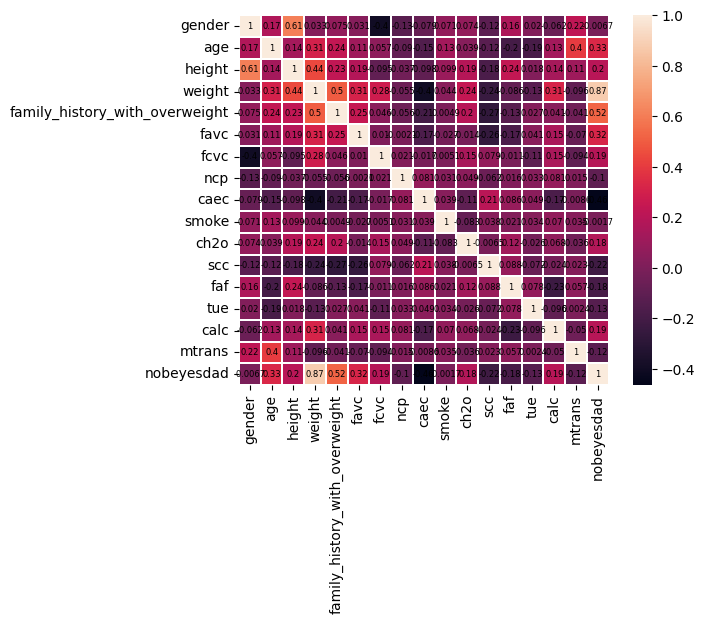

In [85]:
# plot the heatmap
sns.heatmap(
    data = corr_matrix,
    annot_kws = {
        "size": 6,
        "color": "black"
    },
    annot=True,
    square=True,
    linewidths=0.1)

In [86]:
# Search For High Correlation -> Optional

df_corr = df_encode.corr()['nobeyesdad'][:-1]

high_corr = abs(df_corr) >= 0.33
high_col_corr = df_corr[high_corr].sort_values(ascending=False)

print(high_col_corr)

weight                            0.874345
family_history_with_overweight    0.521040
age                               0.332866
caec                             -0.463547
Name: nobeyesdad, dtype: float64


In [87]:
# High corr df0.

high_corr_factor = df_encode[['weight', 'family_history_with_overweight', 'age', 'caec']]
high_corr_factor.head()

,weight,family_history_with_overweight,age,caec
0,64.0,1,21.0,0
1,56.0,1,21.0,0
2,77.0,1,23.0,0
3,87.0,0,27.0,0
5,53.0,0,29.0,0


# Machine Learning Preparation

In [88]:
X = df_encode.drop(columns='nobeyesdad')
y = df_encode['nobeyesdad']

In [89]:
from collections import Counter

In [90]:
Counter(y)

Counter({2: 733, 0: 337, 1: 318})

# Generate Train Test Split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
print('y_train',Counter(y_train))
print('y_test', Counter(y_test))


y_train Counter({2: 587, 0: 270, 1: 253})
y_test Counter({2: 146, 0: 67, 1: 65})


# Modelling & Scalling with Pipeline

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [94]:
pipe_randomforest = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced'))
pipe_logisticregression = make_pipeline(StandardScaler(),LogisticRegression(class_weight='balanced'))
pipe_decisiontree = make_pipeline(StandardScaler(),DecisionTreeClassifier(class_weight='balanced'))

# Training Models

## Random Forest

In [95]:
pipe_randomforest.fit(X_train,y_train)
y_pred_rf = pipe_randomforest.predict(X_test)

print('Hasil model Random Forest :')
print(classification_report(y_test,y_pred_rf))

Hasil model Random Forest :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.97      0.92      0.94        65
           2       0.99      0.99      0.99       146

    accuracy                           0.97       278
   macro avg       0.97      0.96      0.96       278
weighted avg       0.97      0.97      0.97       278



## Logistic Regression

In [96]:
pipe_logisticregression.fit(X_train,y_train)
y_pred_Lr = pipe_logisticregression.predict(X_test)

print('Hasil model Logistic Regression :')
print(classification_report(y_test,y_pred_Lr))

Hasil model Logistic Regression :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.94      0.98      0.96        65
           2       1.00      0.98      0.99       146

    accuracy                           0.98       278
   macro avg       0.98      0.98      0.98       278
weighted avg       0.98      0.98      0.98       278



## Decision Tree

In [97]:
pipe_decisiontree.fit(X_train,y_train)
y_pred_dt = pipe_decisiontree.predict(X_test)

print('Hasil model Decision Tree')
print(classification_report(y_test,y_pred_dt))

Hasil model Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.91      0.94      0.92        65
           2       0.99      0.98      0.99       146

    accuracy                           0.96       278
   macro avg       0.95      0.96      0.96       278
weighted avg       0.96      0.96      0.96       278



# Save Model

In [98]:
import pickle

## Save SAV

In [99]:
with open ('Model Logistic Regression.sav','wb') as model_file:
    pickle.dump(pipe_logisticregression,model_file)

## Save PKL

In [100]:
with open ('Model_Logistic Regression.pkl','wb') as model_file:
    pickle.dump(pipe_logisticregression,model_file)

# Load and Test Model

In [101]:
with open ('Model_Logistic Regression.pkl','rb') as model_file:
    loaded_model = pickle.load(model_file)

In [102]:
X.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1
5,1,29.0,1.62,53.0,0,1,2.0,3.0,0,0,2.0,0,0.0,0.0,1,1


In [103]:
y.head()

0    0
1    0
2    0
3    1
5    0
Name: nobeyesdad, dtype: int64

In [123]:
test_data = [[0,25,1.89,78,0,1,2,1,3,0,1.5,1,1.3,2,0,0]]
test_data = pd.DataFrame(test_data, columns=X.columns)

prediction = loaded_model.predict(test_data)
print(prediction)

if (prediction[0] == 0):
    print('You predicted Normal status')
if (prediction[0] == 1):
    print('You predicted Overweight')
if (prediction[0] == 2):
    print('You predicted Obesity')

[0]
You predicted Normal status


In [124]:
test_data.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,0,25,1.89,78,0,1,2,1,3,0,1.5,1,1.3,2,0,0
